In [308]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('ggplot')

path = "/Users/casadei/dev/casadei/gsgp-mo/results"
approaches = [
    'random-without-replacement', 
    'kmeans'
]
classes = range(2, 6)
datasets = ['airfoil', 'ccn', 'concrete', 'keijzer-7', 'parkinsons', 'ppb', 
            'towerData','vladislavleva-1', 'vladislavleva-4', 'yacht']

strategies = ['current', 'random-without-replacement-2', 'random-without-replacement-3',
             'random-without-replacement-4', 'random-without-replacement-5', 'kmeans-2',
             'kmeans-3', 'kmeans-4', 'kmeans-5']

In [344]:
aggregation = np.median

def handle_individuals(arr):
    return list(map(lambda ind: aggregation(list(map(float, ind.split(';')))), arr))
    
def handle_row(row):
    for i in range(1, len(row)):
        row[i] = aggregation(handle_individuals(str(row[i]).split('|')))
    
    return row
    
def unify(data):
    return data.apply(handle_row, axis=1)

def compute_results(strategies, dataset):
    results = {}
    
    print("Computing results of " + dataset)
    for strategy in strategies:
        #print("Strategy: " + strategy)
        directory = "%s/%s/output-%s" % (path, strategy, dataset)
        results[strategy] = {
            'tr': unify(pd.read_csv(directory + '/trfitness.csv', header = None, error_bad_lines=False)).iloc[:,-1],
            'ts': unify(pd.read_csv(directory + '/tsfitness.csv', header = None, error_bad_lines=False)).iloc[:,-1],
            'smartTr': pd.read_csv(directory + '/smart_tr_fitness.csv', header = None).iloc[:,-1],
            'smartTs': pd.read_csv(directory + '/smart_ts_fitness.csv', header = None).iloc[:,-1]
        }
        
    return results

def compute_all(strategies, datasets):
    results = {}
    
    for dataset in datasets:
        results[dataset] = compute_results(strategies, dataset)
    
    return results

In [345]:
results = compute_all(strategies, datasets)

Computing results of airfoil
Computing results of ccn
Computing results of concrete
Computing results of keijzer-7
Computing results of parkinsons
Computing results of ppb


b'Skipping line 37: expected 252 fields, saw 257\n'
/Users/casadei/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Computing results of towerData
Computing results of vladislavleva-1
Computing results of vladislavleva-4
Computing results of yacht


b'Skipping line 8: expected 252 fields, saw 294\n'


In [330]:
def median(arr):
    arr[~np.isfinite(arr)] = 0
    return np.median(arr)

def fill_graph(results, graph, dataset, mode):
    if (mode == 'training'):
        columns = ('tr', 'smartTr')
    else:
        columns = ('ts', 'smartTs')

    current = []
    random_aggr = []
    random_smart = []
    kmeans_aggr = []
    kmeans_smart = []

    for k in classes:
        current.append(median(results[dataset]['current'][columns[0]]))
        random_aggr.append(median(results[dataset]['random-without-replacement-' + str(k)][columns[0]]))
        random_smart.append(median(results[dataset]['random-without-replacement-' + str(k)][columns[1]]))
        kmeans_aggr.append(median(results[dataset]['kmeans-' + str(k)][columns[0]]))
        kmeans_smart.append(median(results[dataset]['kmeans-' + str(k)][columns[1]]))


    graph.title(mode)
    graph.plot(classes, current, linestyle="dashed", color='gray', label='Single Objective', alpha=0.5)
    graph.plot(classes, random_aggr, color='red', label='Random MO Aggregated', alpha=0.5)
    graph.plot(classes, random_smart, color='red', linestyle="dotted", label='Random MO Smart', alpha=0.5)
    graph.plot(classes, kmeans_aggr, color='blue', label='KMeans MO Aggregated', alpha=0.5)
    graph.plot(classes, kmeans_smart, color='blue', linestyle="dotted", label='KMeans MO Smart', alpha=0.5)
    graph.xticks(classes, [2, 3, 4, 5])
    graph.legend()
    
    return graph

def fill_dataset_graph(results, dataset):
    fig = plt.figure()
    fig.suptitle(dataset, fontsize="x-large")
    plt.subplot(1, 2, 1)
    fill_graph(results, plt, dataset, 'training')
    plt.subplot(1, 2, 2)
    fill_graph(results, plt, dataset, 'test')
    plt.show()
    

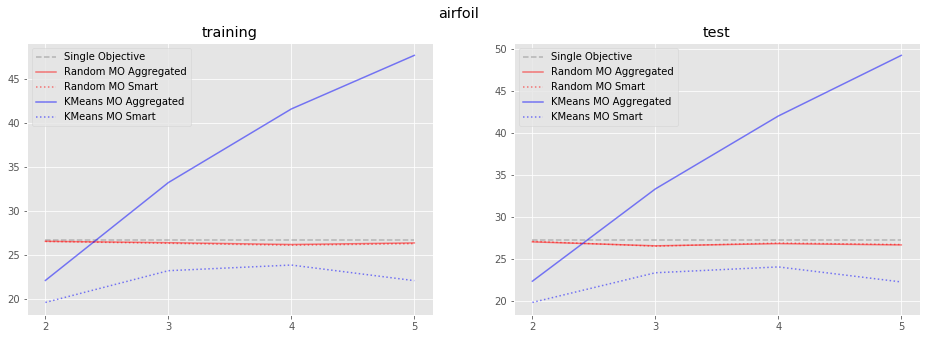

In [331]:
fill_dataset_graph(results, 'airfoil')

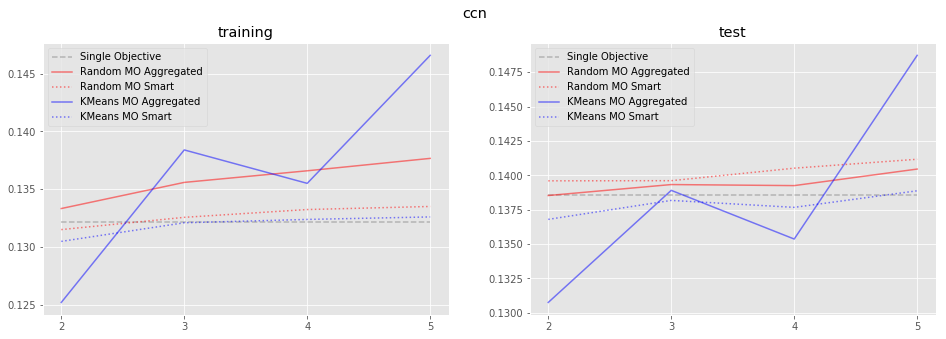

In [332]:
fill_dataset_graph(results, 'ccn')

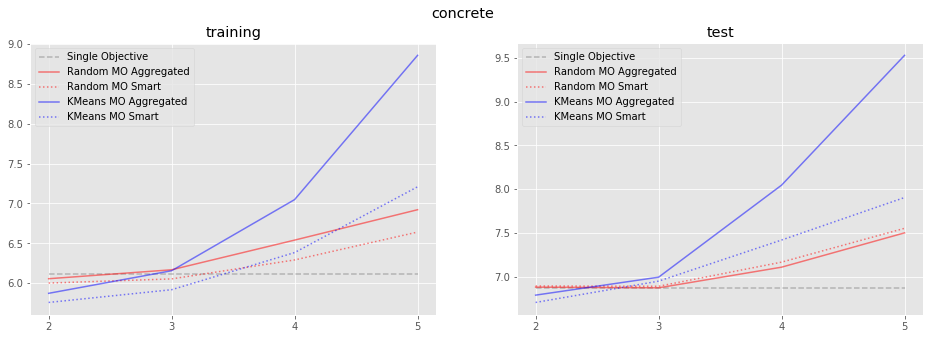

In [300]:
fill_dataset_graph(results, 'concrete')

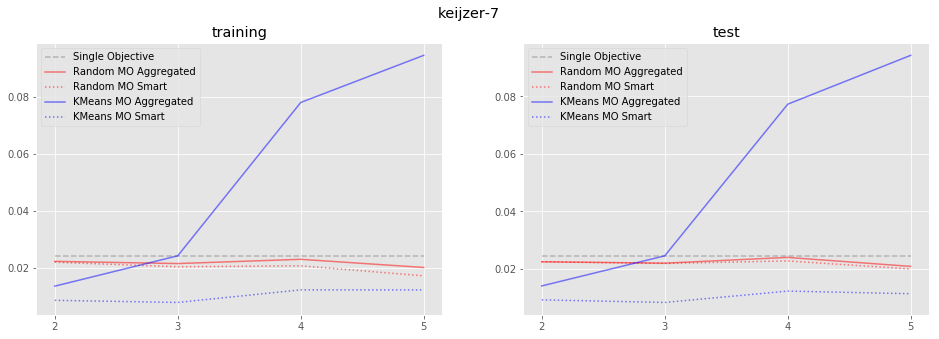

In [333]:
fill_dataset_graph(results, 'keijzer-7')

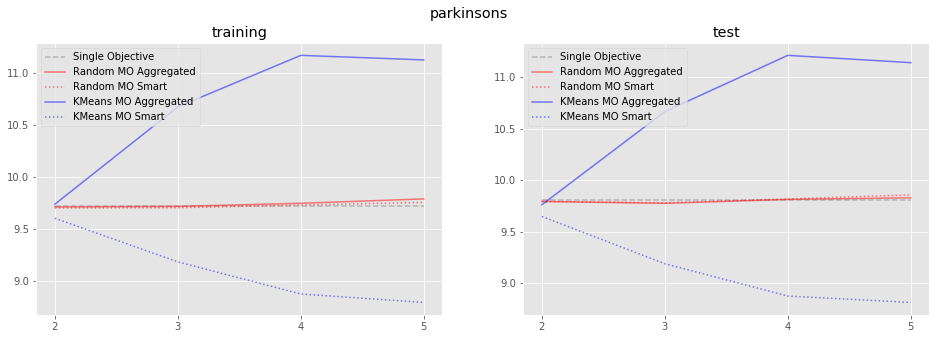

In [334]:
fill_dataset_graph(results, 'parkinsons')

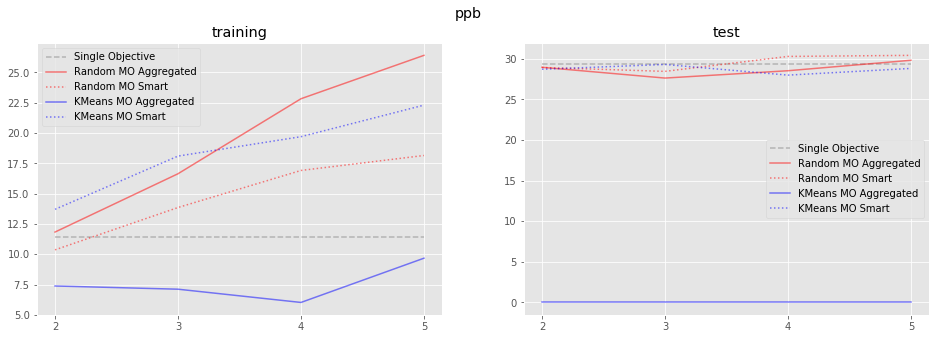

In [335]:
fill_dataset_graph(results, 'ppb')

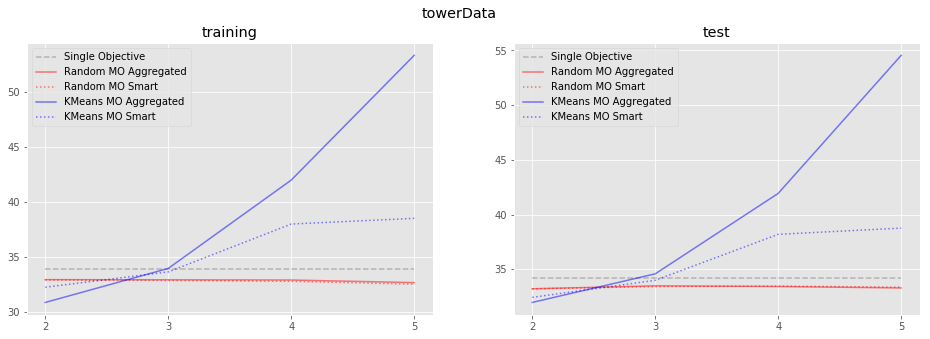

In [336]:
fill_dataset_graph(results, 'towerData')

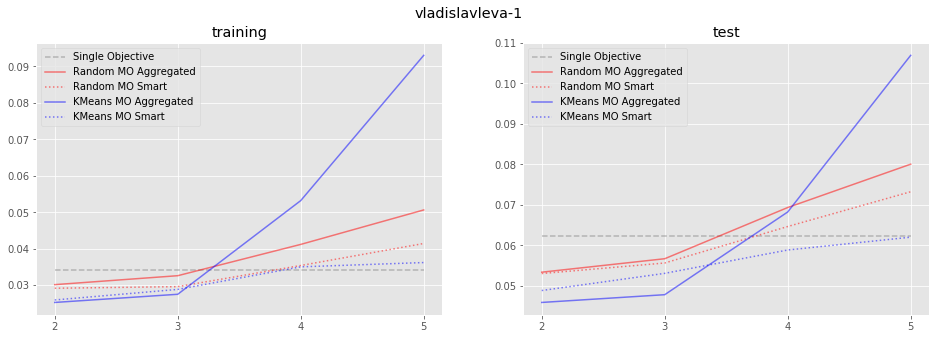

In [337]:
fill_dataset_graph(results, 'vladislavleva-1')

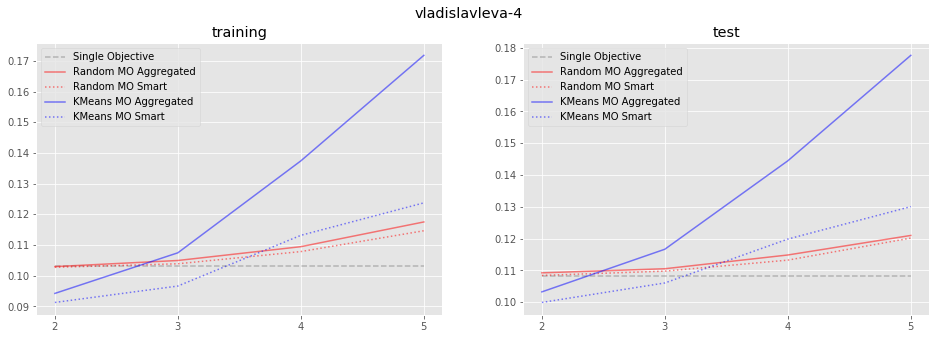

In [338]:
fill_dataset_graph(results, 'vladislavleva-4')

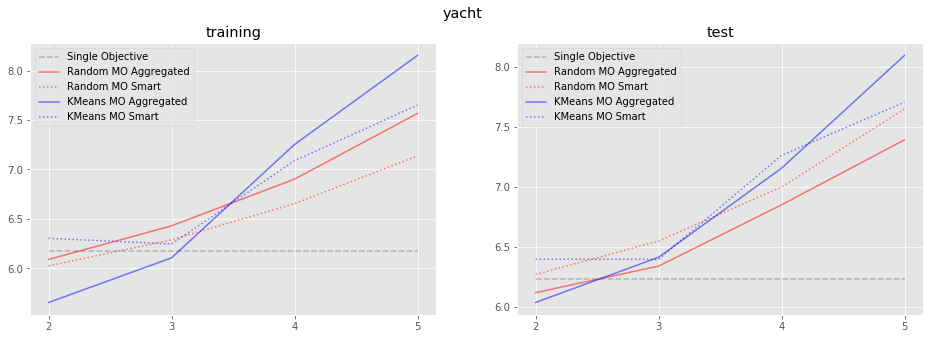

In [339]:
fill_dataset_graph(results, 'yacht')

In [341]:
results['ccn']['kmeans-2']

{'smartTr': 0     0.13095
 1     0.12768
 2     0.13254
 3     0.12822
 4     0.13325
 5     0.12710
 6     0.12979
 7     0.13234
 8     0.12882
 9     0.13445
 10    0.12993
 11    0.12782
 12    0.13287
 13    0.12835
 14    0.12964
 15    0.13281
 16    0.12707
 17    0.13281
 18    0.12821
 19    0.13417
 20    0.13050
 21    0.12740
 22    0.13314
 23    0.12890
 24    0.13084
 25    0.12952
 26    0.13326
 27    0.13236
 28    0.12879
 29    0.13422
 30    0.13068
 31    0.12832
 32    0.13217
 33    0.12821
 34    0.13047
 35    0.13474
 36    0.12787
 37    0.13217
 38    0.12779
 39    0.13427
 40    0.12726
 41    0.12920
 42    0.13327
 43    0.12766
 44    0.13119
 45    0.13274
 46    0.13474
 47    0.12808
 48    0.12809
 49    0.13480
 Name: 1, dtype: float64, 'smartTs': 0     0.13688
 1     0.14887
 2     0.12748
 3     0.14913
 4     0.12412
 5     0.14660
 6     0.13616
 7     0.12875
 8     0.14827
 9     0.12296
 10    0.13709
 11    0.14963
 12    0.12824
 13    0

2.0